In [54]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from stuff import plotter
from stuff import stuff
import scipy as sp
from scipy.interpolate import interp1d
from scipy import signal
from scipy.optimize import curve_fit
#from detect_peaks import detect_peaks
import scipy.optimize as opt
from scipy.signal import savgol_filter
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
from pylab import *

# Hall Effect

### As it turns out its classical Hall Effect...

### Data analysis:
1). Calculate the Hall coefficient $R_H$, the density of the charge carriers, the Drift velocity and the mobility of the holes from the data obtained under 1) and 2) $\textbf{Vlad}$

2). Explain the in 5) measured temperature dependence of the voltage drop and determine the bandgap Eg of Germanium.
$\textbf{Vlad}$

3). Explain the under 4) measured temperature dependent conductivity of the p-doped crystal. Why does the resistance increase first, can you make an estimation of the activation energy Ea of the holes? Determine the bandgap Eg from the data measured under 4). $\textbf{Vlad}$

4). Deduce an expression for the temperature dependency of the Hall voltage $\textbf{Sam}$

5). Fit with this expression the under 3) measured temperature dependence of $U_H$. Use the under 2) obtained bandgap Eg and the under 1) obtained carrier density of the holes. From the fit the effective density of states N0 and the ratio of the hole to the electron mobility $\mu_n/\mu_p$ can be determined. Explain the obtained result. Why does it increase first, which condition must be fulfilled at the zero crossing? Why does UH go to zero for high temperatures?
$\textbf{Sam}$

# Experimental tasks


In [55]:
folder = "/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/UniStuttLabs/data/"
folder2 = "/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/HallEffect/A4/"

In [56]:
# folder = "/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/HallEffect/A4/"
x,y = stuff.hallEffectOpenTxtWithData(folder2, "task4.txt")

## p-doped Germanium:

1). Calculate the Hall coefficient $R_H$, the density of the charge carriers, the Drift velocity and the mobility of the holes from the data obtained under 1) and 2)

1). Measure the Hall voltage $U_H$ at 3 different magnetic field strength (50mT, 100mT, 200mT) against the current I between 0 and 30mA

In [57]:
errorX = 0
errorY = 0
yLabel = r'$U_H$, V'
xLabel = r'I, mA'

### All in one


Text(0.73,0.75,'U_H = (-7570.233 $\\cdot$ B + 5.542) mV')

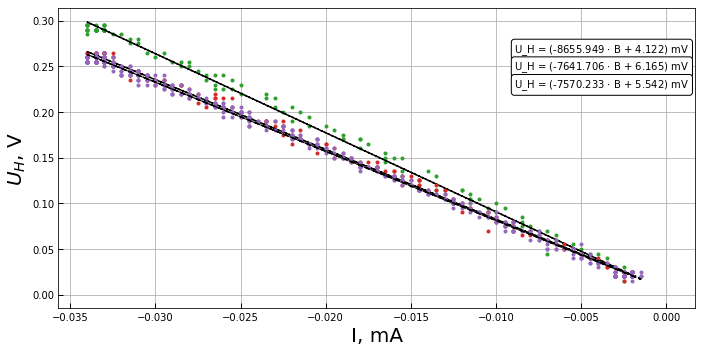

In [58]:
x1, y1 = stuff.hallEffectOpenTxtWithData(folder, "Task1_50mT.txt")
x1=np.array(x1)
y1=np.array(y1)
plotName = "Uh50mT"
fig, ax = plotter.simplePlot(0, 0, errorX=errorX, errorY=errorY, xLabel=xLabel, yLabel=yLabel, plotName=plotName)
plt.plot(x1,y1, ".")
m,b = polyfit(x1, y1, 1)
plt.plot(x1, m*x1+b, '--k') 
plt.annotate(f'U_H = ({np.round(1e3*m,3)} $\cdot$ B + {round(1e3*b,3)}) mV',
           xy=(0.73, 0.85),
           xycoords='figure fraction', bbox=dict(boxstyle='round', fc='white', alpha=1))

x2, y2 = stuff.hallEffectOpenTxtWithData(folder, "Task1_100mT.txt")
x2=np.array(x2)
y2=np.array(y2)
plt.plot(x2,y2, '.')
m,b = polyfit(x2, y2, 1)
plt.plot(x2, m*x2+b, '--k') 
plt.annotate(f'U_H = ({np.round(1e3*m,3)} $\cdot$ B + {round(1e3*b,3)}) mV',
           xy=(0.73, 0.80),
           xycoords='figure fraction', bbox=dict(boxstyle='round', fc='white', alpha=1))

x3, y3 = stuff.hallEffectOpenTxtWithData(folder, "Task1_200mT.txt")
x3=np.array(x3)
y3=np.array(y3)
plt.plot(x3,y3, '.')
m,b = polyfit(x3, y3, 1)
plt.plot(x3, m*x3+b, '--k') 
plt.annotate(f'U_H = ({np.round(1e3*m,3)} $\cdot$ B + {round(1e3*b,3)}) mV',
           xy=(0.73, 0.75),
           xycoords='figure fraction', bbox=dict(boxstyle='round', fc='white', alpha=1))

2). Measure the Hall voltage $U_H$ against the magnetic field at 3 different currents (10mA, 20mA, 30mA)

In [59]:
yLabel = r'$U_H$, V'
xLabel = r'B, mT'
errorX = 0
errorY = 0

### 10mA

In [60]:
taskName = "Task2_10mA.txt"
text_file = open(folder + taskName, "r")
lines = text_file.readlines()
typeData = lines[4]
data = lines[4:]
data = [i.split("\t") for i in data]
dat = pd.DataFrame(data)
x1 = dat[dat.columns[1]]
y1 = dat[dat.columns[2]]
y1 = list(y1.values)
y1 = [float(i.replace(",", ".").replace("\n", "")) for i in y1[1:] if i != '']
x1 = list(x1.values)
x1 = [float(i.replace(",", ".").replace("\n", "")) for i in x1[1:] if i != '']
x1=np.array(x1)
y1=np.array(y1)

Text(0.73,0.75,'U_H = (-0.178 $\\cdot$ B + 266.535) mV')

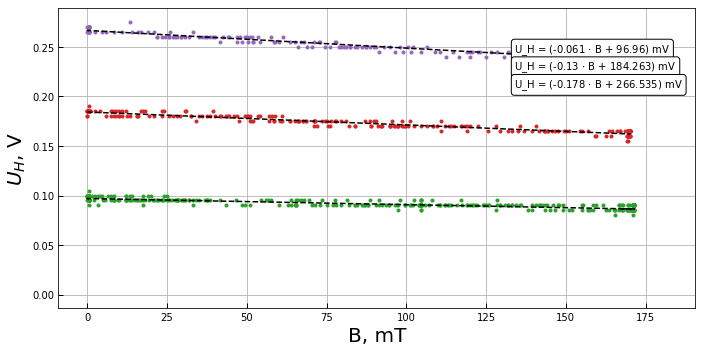

In [61]:
fig, ax = plotter.simplePlot(0, 0, errorX=errorX, errorY=errorY, xLabel=xLabel, yLabel=yLabel, plotName=plotName)       
plt.plot(x1,y1, ".")
m,b = polyfit(x1, y1, 1)
plt.plot(x1, m*x1+b, '--k') 
plt.annotate(f'U_H = ({np.round(1e3*m,3)} $\cdot$ B + {round(1e3*b,3)}) mV',
           xy=(0.73, 0.85),
           xycoords='figure fraction', bbox=dict(boxstyle='round', fc='white', alpha=1))



taskName = "Task2_20mA.txt"
text_file = open(folder + taskName, "r")
lines = text_file.readlines()
typeData = lines[4]
data = lines[4:]
data = [i.split("\t") for i in data]
dat = pd.DataFrame(data)
x2 = dat[dat.columns[1]]
y2 = dat[dat.columns[2]]

y2 = [float(i.replace(",", ".").replace("\n", "")) for i in y2[1:] if i != '']
x2 = [float(i.replace(",", ".").replace("\n", "")) for i in x2[1:] if i != '']
x2=np.array(x2)
y2=np.array(y2)
plt.plot(x2,y2, ".")
m,b = polyfit(x2, y2, 1)
plt.plot(x2, m*x2+b, '--k') 
plt.annotate(f'U_H = ({np.round(1e3*m,3)} $\cdot$ B + {round(1e3*b,3)}) mV',
           xy=(0.73, 0.80),
           xycoords='figure fraction', bbox=dict(boxstyle='round', fc='white', alpha=1))


taskName = "Task2_30mA.txt"
text_file = open(folder + taskName, "r")
lines = text_file.readlines()
typeData = lines[4]
data = lines[4:]
data = [i.split("\t") for i in data]
dat = pd.DataFrame(data)
x3 = dat[dat.columns[1]]
y3 = dat[dat.columns[2]]
y3 = [float(i.replace(",", ".").replace("\n", "")) for i in y3[1:] if i != '']
x3 = [float(i.replace(",", ".").replace("\n", "")) for i in x3[1:] if i != '']
x3=np.array(x3)
y3=np.array(y3)
plt.plot(x3,y3, ".")
m,b = polyfit(x3, y3, 1)
plt.plot(x3, m*x3+b, '--k') 
plt.annotate(f'U_H = ({np.round(1e3*m,3)} $\cdot$ B + {round(1e3*b,3)}) mV',
           xy=(0.73, 0.75),
           xycoords='figure fraction', bbox=dict(boxstyle='round', fc='white', alpha=1))



 Fit with this expression the under 3) measured temperature dependence of  $U_H$
 . Use the under 2) obtained bandgap Eg and the under 1) obtained carrier density of the holes. From the fit the effective density of states N0 and the ratio of the hole to the electron mobility  μn/μp
  can be determined. Explain the obtained result. Why does it increase first, which condition must be fulfilled at the zero crossing? Why does $U_H$ go to zero for high temperatures?

# 3. 
Measure the Hall voltage $U_H$ at B=200mT and I=30mA against temperature.

$U_{\mathrm{H}}=\frac{p_{\mathrm{s}}+\left(\sqrt{\frac{p_{s}^{2}}{4}+N_{0}^{2} \mathrm{e}^{-E_{\mathrm{g}} / k_{\mathrm{b}} T}}-\frac{p_{\mathrm{s}}}{2}\right)\left(1-k^{2}\right)}{\left(\mathrm{p}_{\mathrm{s}}+\left(\sqrt{\frac{p_{\mathrm{s}}^{2}}{4}+N_{0}^{2} \mathrm{e}^{-E_{\mathrm{g}} / k_{\mathrm{b}} T}}-\frac{p_{\mathrm{s}}}{2}\right)(1+k)\right)^{2}} \cdot \frac{I \cdot B}{\mathrm{e} \cdot d}$

In [312]:
I=30*1e-3
B=200*1e-3
e=1.6*1e-19
d=0.01
C = 7.49*10**22#I*B/(e*d)
def uh(T, *p):
    ps=3.17*1e21
    kb=8.6173*1e-5
    N0=p[0]
    k=p[1]
    A=p[2]
    Eg=0.74
    return A + C*(ps + (np.sqrt(ps**2/4 + e**(-(Eg)/(kb*T))*N0**2) - ps/2)*(1-k**2))/(ps + (np.sqrt(ps**2/4 + N0**2*e**(-Eg/(kb*T))) - ps/2)*(1+k))**2

In [52]:
1/(8.6173*1e-5)

11604.56291413784

In [313]:
def testUh(T, *p):
    A = 3.17*1e21
    
    C=0.74
    B, D, E = p
    return (E*(A+(np.sqrt(A**2/4+B**2*np.exp(-C*13025.9/T))-A/2)*(1-D**2))/ ((A+(np.sqrt(A**2/4+B**2*np.exp(-C*13025.9/T))-A/2)*(1+D))**2) *7.49*1e22)

In [314]:
x_test=np.linspace(320,440,500)

In [315]:
yTest = testUh(x_test, 1.6092629170e+26, 1.5,
 8.30795241e-03)

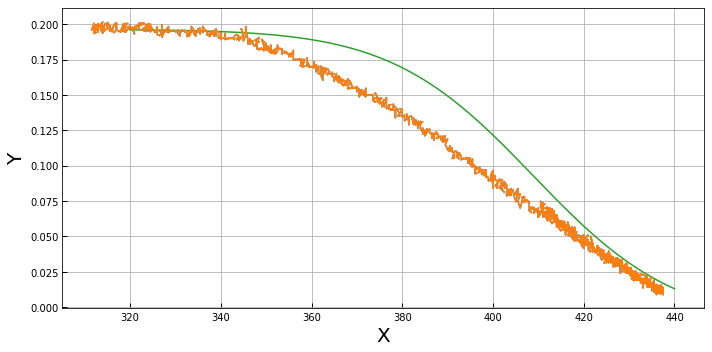

In [316]:
fig, ax = plotter.simplePlot(x, y)
plt.plot(x_test, yTest)

In [71]:
errorX = 0
errorY = 0
yLabel = r'$U_H$, V'
xLabel = r'T, K'
plotName = "3UhT"

OPTIMIZED PARAMETERS: cureveN[N0, k] [1.60926292e+26 1.79991125e+00 7.88886792e-03]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in power
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


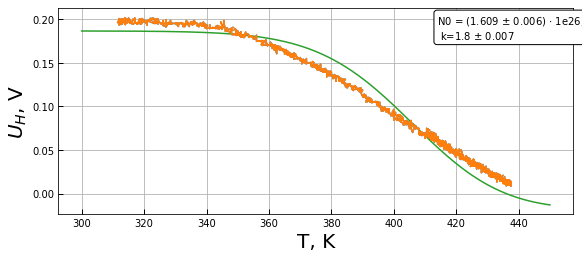

In [341]:
taskName = "Task3dopedshit.txt"
text_file = open(folder + taskName, "r")
lines = text_file.readlines()
typeData = lines[4]
data = lines[4:]
data = [i.split("\t") for i in data]
dat = pd.DataFrame(data)
x = dat[dat.columns[1]]
y = dat[dat.columns[2]]
y = list(y.values)
y = [float(i.replace(",", ".").replace("\n", "")) for i in y[1:] if i != '']
x = list(x.values)
x = [float(i.replace(",", ".").replace("\n", "")) for i in x[1:] if i != '']
x = 100*np.array(x) + 273 #T = U_t*100 + 273
x=x[0:1700]
y=y[0:1700]
y = savgol_filter(y, 13, 10)
fig, ax = plotter.simplePlot(x, y, xLabel=xLabel, yLabel=yLabel,plotName="$U_H(T)$")
#### Fitting params
guess = [1e27, 205] #[U0, Eg]
# guess = [3.2810240413e+21, 1.6092629170e+26, 7.191929716e-01, 1.8,
#  8.30795241e-03]
guess = [1.6092629170e+26, 1.8, 8.30795241e-03]
# bounds=([1e20, 0, 0, 1, 0], [4.1*1e21, 3*1e26, 1.0, 2, 1])
bounds=([0, 1, 0], [3*1e26, 2, 1])
popt, pcov = curve_fit(testUh, np.array(x[:len(y)]), np.array(y), p0=guess, bounds=bounds)
perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
print ("OPTIMIZED PARAMETERS: cureveN[N0, k]", popt)
plt.annotate(f'N0 = ({round(popt[0]*1e-26, 3)} $\pm$ {round(1e26*perr[0],3)}) $\cdot$ 1e26, \n k={round(popt[1], 3)} $\pm$ {round(perr[1],3)}',
           xy=(0.75, 0.85),  
           xycoords='figure fraction', bbox=dict(boxstyle='round', fc='white', alpha=1))
fit = uh(x, *popt)
x_test = np.linspace(300,450, len(x))
# fig, ax = plotter.simplePlot(newX, newY, errorX, errorY, xLabel, yLabel, plotName)
plt.plot(x_test, fit , 'r-', linewidth = 1)
plt.plot(x_test, testUh(x_test, *popt))
fig.tight_layout()
fig.savefig("U_h(T)", dpi=300)

Deduce an expression for the temperature dependency of the Hall voltage

$U_{\mathrm{H}}=\frac{p_{\mathrm{s}}+\left(\sqrt{\frac{p_{s}^{2}}{4}+N_{0}^{2} \mathrm{e}^{-E_{\mathrm{g}} / k_{\mathrm{b}} T}}-\frac{p_{\mathrm{s}}}{2}\right)\left(1-k^{2}\right)}{\left(\mathrm{p}_{\mathrm{s}}+\left(\sqrt{\frac{p_{\mathrm{s}}^{2}}{4}+N_{0}^{2} \mathrm{e}^{-E_{\mathrm{g}} / k_{\mathrm{b}} T}}-\frac{p_{\mathrm{s}}}{2}\right)(1+k)\right)^{2}} \cdot \frac{I \cdot B}{\mathrm{e} \cdot d}$

https://warwick.ac.uk/fac/sci/physics/current/postgraduate/regs/mpagswarwick/ex5/techniques/electronic/hall-effect/temperature/

# 4. 
Measure the voltage drop U against the temperature at I=30mA

In [344]:
#Plot settings
errorX = 0
errorY = 0
yLabel = r'$U$, V'
xLabel = r'T, K'
plotName = "4UT"

In [345]:
from sympy import *
# from sympy import init_session
init_printing(use_unicode=True)
# init_session() # doctest: +SKIP

In [20]:
def funcExp(T, *p):
    kb=8.6173*1e-5
    U0=p[0]
    Eg=p[1]
    return U0*np.exp(Eg/(2.0*T*kb))

In [21]:
taskName="task4.txt"
taskName = "Task4txt.txt"
# x,y = hallEffectOpenTxtWithData(folder, "task4.txt")
text_file = open(folder + taskName, "r")
lines = text_file.readlines()
typeData = lines[4]
data = lines[4:]
data = [i.split("\t") for i in data]
dat = pd.DataFrame(data)
x = dat[dat.columns[1]]
y = dat[dat.columns[2]]
y = list(y.values)
y = [float(i.replace(",", ".").replace("\n", "")) for i in y[1:] if i != '']
x = list(x.values)
x = [float(i.replace(",", ".").replace("\n", "")) for i in x[1:] if i != '']
x = 100*np.array(x) + 273 #T = U_t*100 + 273

OPTIMIZED PARAMETERS: cureveN[U0, Eg] [4.80946018e-05 6.77784339e-01]


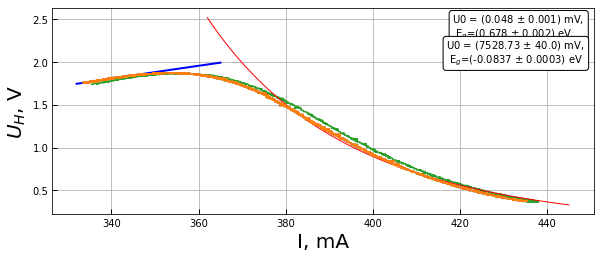

In [22]:
a=1200
b=5000
#decreasing temperature - blue
x_down = x[a:b]
y_down = y[a:b]
fig, ax = plotter.simplePlot(x_down, y_down, xLabel=xLabel, yLabel=yLabel)  #, errorX, errorY, xLabel, yLabel, plotName)
#increasing temperature - green
x_up = x[200:a]
y_up = y[200:a]
plt.plot(x_up,y_up)

#fitBounds for increasing
ub = 1100 #upper bound
lb = 550 #lower bound
x1 = x[lb:ub]
y1 = np.array(y[lb:ub])

#fitBounds for decreasing
ub = 2600 #upper bound
lb = 1200 #lower bound
x1 = x[lb:ub]
y1 = np.array(y[lb:ub])
#plt.plot(x1,y1)
U0 = 100
Eg = 0.7
u0 = 0.1
guess = [U0, Eg]
bounds=([-1e3,-1e3], [1e8, 1e8])
popt, pcov = curve_fit(funcExp, np.array(x1[:len(y1)]), np.array(y1), p0=guess, bounds=bounds)
popt2, pcov2 = curve_fit(funcExp, np.array(x_down[:len(y_down)][2800:5500]), np.array(y_down[2800:5500]), p0=guess, bounds=bounds)
perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
perr2 = np.sqrt(np.diag(pcov2)[np.diag(pcov)>0])
print("OPTIMIZED PARAMETERS: cureveN[U0, Eg]", popt)
plt.annotate(f'U0 = ({round(1e3*popt[0], 3)} $\pm$ {1e3*round(perr[0],6)}) mV, \n E$_g$=({round(popt[1], 3)} $\pm$ {round(perr[1],3)}) eV',
           xy=(0.75, 0.85),
           xycoords='figure fraction', bbox=dict(boxstyle='round', fc='white', alpha=1))
fit = funcExp(np.linspace(362,445,50), *popt)
plt.plot(np.linspace(362,445,50), fit , 'r-', linewidth = 1)

plt.annotate(f'U0 = ({round(1e3*popt2[0], 2)} $\pm$ {1e3*round(perr2[0],2)}) mV, \n E$_g$=({round(popt2[1], 4)} $\pm$ {round(perr2[1],4)}) eV',
           xy=(0.74, 0.75),
           xycoords='figure fraction', bbox=dict(boxstyle='round', fc='white', alpha=1))
fit2 = funcExp(np.linspace(332,365,50), *popt2)
plt.plot(np.linspace(332,365,50), fit2 , 'b-', linewidth = 2)
fig.tight_layout()
fig.savefig("task4.png", dpi=300)

4). Explain the measured temperature dependent conductivity of the p-doped crystal. Why does the resistance increase first, can you make an estimation of the activation energy Ea *what's that shit?* of the holes? Determine the bandgap Eg.

## Undoped Germanium

 Explain the in 5) measured temperature dependence of the voltage drop and determine the bandgap Eg of Germanium.

5) Measure the voltage drop U at constant current I=2mA against the temperature

I = -0.0022A

In [40]:
taskName = "undopedGe5.txt"
text_file = open(folder + taskName, "r")
lines = text_file.readlines()
typeData = lines[4]
data = lines[5:]
data = [i.split("\t") for i in data]
dat = pd.DataFrame(data)
x = dat[dat.columns[2]]
y = dat[dat.columns[4]]
y = list(y.values)
y = [i.replace(",", ".").replace("\n", "") for i in y[1:] if i != '']

In [41]:
y = [float(i) for i in y[1:] if i != '']

In [42]:
x = list(x.values)
x = [i.replace(",", ".").replace("\n", "") for i in x[1:] if i != '']
x = [float(i) for i in x[1:] if i != '']
x = 100*np.array(x) + 273 #T = U_t*100 + 273

OPTIMIZED PARAMETERS: cureveN[U0, Eg, C] [6.02378427e-07 7.88919706e-01]


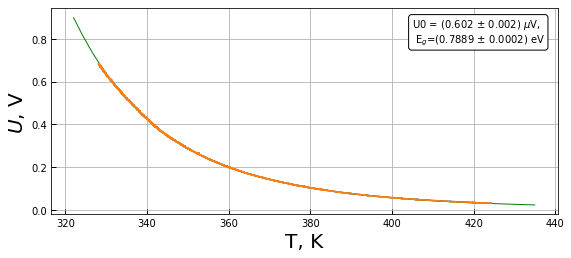

In [43]:
a=1000
b=5000
#decreasing temperature - blue
x1 = x[a:b]
y1 = y[a:b]
fig, ax = plotter.simplePlot(x1, y1, xLabel=xLabel, yLabel=yLabel)#, errorX, errorY, xLabel, yLabel, plotName)

U0 = 100
Eg = 0.7
guess = [U0, Eg]
bounds=([-1e8,0], [1e8, 1e5])
popt, pcov = curve_fit(funcExp, np.array(x1[:len(y1)]), np.array(y1), p0=guess, bounds=bounds)
perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
print ("OPTIMIZED PARAMETERS: cureveN[U0, Eg, C]", popt)
plt.annotate(f'U0 = ({round(1e6*popt[0],3)} $\pm$ {round(1e6*perr[0],3)}) $\mu$V, \n E$_g$=({round(popt[1], 4)} $\pm$ {round(perr[1],4)}) eV',
           xy=(0.72, 0.83),  
           xycoords='figure fraction', bbox=dict(boxstyle='round', fc='white', alpha=1))
fit = funcExp(np.linspace(322,435,50), *popt)
plt.plot(np.linspace(322,435,50), fit , 'g-', linewidth = 1)
fig.tight_layout()
fig.savefig("task5.png", dpi=300)

$k=\frac{\mu_{n}}{\mu_{p}}$

$U_{\mathrm{H}}=\frac{p_{\mathrm{s}}+\left(\sqrt{\frac{p_{s}^{2}}{4}+N_{0}^{2} \mathrm{e}^{-E_{\mathrm{g}} / k_{\mathrm{b}} T}}-\frac{p_{\mathrm{s}}}{2}\right)\left(1-k^{2}\right)}{\left(\mathrm{p}_{\mathrm{s}}+\left(\sqrt{\frac{p_{\mathrm{s}}^{2}}{4}+N_{0}^{2} \mathrm{e}^{-E_{\mathrm{g}} / k_{\mathrm{b}} T}}-\frac{p_{\mathrm{s}}}{2}\right)(1+k)\right)^{2}} \cdot \frac{I \cdot B}{\mathrm{e} \cdot d}$

$ U_H = \frac{IB}{d}\cdot R_H = \frac{IB}{d}\frac{p}{e}{p^2-N^2_0e^{-E_g/kT}k^2 \over \left(p^2+N^2_0 e^{-E_g/kT}k\right)^2}$

$R_{H}=\frac{p \mu_{h}^{2}-n \mu_{e}^{2}}{e\left(p \mu_{h}+n \mu_{e}\right)^{2}}=$

${\mu^2_p(p-nk^2)\over e\mu^2_p(p+nk)^2}=$

$\eta = n\cdot p = n_i \cdot(p_i + p_d) = N^2_{0} e^{-E_g / k T}$

${(p-nk^2)\over e(p+nk)^2}={p-\frac{N^2_0}{p}e^{-E_g/kT}k^2 \over \left(p+\frac{N^2_0}{p}e^{-E_g/kT}k\right)^2}=\frac{p}{e}{p^2-N^2_0e^{-E_g/kT}k^2 \over \left(p^2+N^2_0 e^{-E_g/kT}k\right)^2}$

Thus,
$U_H = \frac{IB}{d}*R_H = \frac{IB}{d}\frac{p}{e}{p^2-N^2_0e^{-E_g/kT}k^2 \over \left(p^2+N^2_0 e^{-E_g/kT}k\right)^2}$

$R_{H}=\frac{p-n b^{2}}{e(p+n b)^{2}}$

$R_{\mathrm{H}}=\frac{E_{y}}{j_{x} B_{z}}$

$R_{\mathrm{H}}=\frac{E_{y}}{j_{x} B}=\frac{V_{\mathrm{H}} t}{I B}=-\frac{1}{n e}$

$\mu=\frac{R_{H}}{\rho}$

$v_{xh} = \mu_h E_x$

$R_{H}=\frac{V_{H} t}{I B}$

$U_{out}=\frac{I B}{e n d}$, d - thikness

$U_{\text {out}}=R_{H} \frac{I B}{d}$

$R_{H}=\frac{E_{H}}{J B}=\frac{1}{n e}$ -> $U_{H}=w E_{H}$ -> $\sigma=n e \mu_{e/p}$ -> $\mu=\left|R_{H}\right| \sigma$

$\rho = RA/L$, $\sigma = 1/\rho$

$1 / \rho=e \cdot\left(n \cdot \mu_{n}+p \cdot \mu_{p}\right)$

$n \times p = n_i^2$

$\mu_p/\mu_e = e/p$

$p=n_{i}^{2} / n=\left(Q_{n} Q_{p} / p\right) \exp (-\Delta / k T)$

$Q_{n}=2\left(\frac{m_{n} k T}{2 \pi \hbar^{2}}\right)^{3 / 2}$

$\sigma=\sigma_{0} \exp \left(-\frac{E_{\mathrm{g}}}{2 k_{B} T}\right)$

$\mu_{\mathrm{n}}=-R_{\mathrm{H}} \sigma=\frac{\sigma}{n e}$

$\mu_{\mathrm{p}}=R_{\mathrm{H}} \sigma=\frac{\sigma}{p e} = {e\tau \over 2m^{*}}$

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML
Image("/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/HallEffect/Screenshot 2019-04-16 at 12.04.22.png")

In [ ]:
Image(html="/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/HallEffect/tempe")

###  Bandstructure of a semiconductor (SC) (Vlad)

A separate atom has a descrete energetic spectrum, however if an ansamble of atoms is taken into consideration the electrons do not belong to an atom but to the crystall itself. In a crystall the electronic wavefunction can be described by Bloch waves: 

$\psi(\mathbf{r})=e^{i \mathbf{k} \mathbf{r}} u_{\mathbf{k}}(\mathbf{r})$
,where $u_{\mathbf{k}}(\mathbf{r})$ has the period of the crystal lattice with $u_{\mathbf{k}}(\mathbf{r})$ 􏰊 = $u_{\mathbf{k}}(\mathbf{r + T})$. This also implyes that $\psi_{\boldsymbol{k}+\boldsymbol{G}}(\boldsymbol{r})=\psi_{\boldsymbol{k}}(\boldsymbol{r})$ and $E(\boldsymbol{k})=E(\boldsymbol{k}+\boldsymbol{G})$.

At the edge of the Brillouine zone two waves could be considered non-vanishing:
$\psi_{k} = e^{i\frac{G}{2}r}$ and $\psi_{k - G} = e^{i(\frac{G}{2} - G)r} = e^{-i\frac{G}{2}r}$,
thus considering the ansatz: $\psi(r) = \sum\limits_{k} C_k e^{ikr}$ one receives two approximate solutions $\psi_{+} \sim\left(\mathrm{e}^{\mathrm{i} G x / 2}+\mathrm{e}^{-\mathrm{i} G x / 2}\right) \sim \cos \pi \frac{x}{a}$ and $\psi_{-} \sim\left(\mathrm{e}^{\mathrm{i} G x / 2}-\mathrm{e}^{-\mathrm{i} G x / 2}\right) \sim \sin \pi \frac{x}{a}$, which represent the two standing waves as a result of superposition of propagating plane wave and Bragg-reflected counter propagating wave.
The resulting pictures is presented on the Fig.[a]. As one can see, the probability density correspondent to the standing wave solutions have either minimas between the cores or maximas. The state with maximas at the cores, apparently has less energy(due to the presence of the core potential), than the one with maximas in between. This discrepancy leads to an existence of energy bandgaps in nearly free approximation. 

In case of a less dense material, when the distance between atoms is sufficiently large, such that electrons can be considered localized at the cores the tight binding approximation is used for deduction of energy bandgaps.
Electrons localized on the cores can be described as a set of potential wells, however electronic wavefunctions overlap and an electron can tunnel between cores potential wells. Each neighbouring atom lead to additional splitting of the stationary levels in the core potential wells and when the number of such neighbours is large enough the energy levels become quasi-continous and lead to creation of energy bandgaps.

###  Transport in SC (Vlad)

An electron propagating in a crystal can be represented as a Bloch wave, thus taking into account periodicity of a lattice. However, in order to fully describe dynamic properties of an electron in a lattice the Bragg reflection on the edges of the Brillouine zone should be considered. In other words, dynamics of an electron represented as a spatially modulated wave can be desribed in semiclassical manner. In particular, the equations of motion of an electron in an external electric field and with internal field introduced by atoms of a crystall can be represented as follows:
$\dot{v}_{i}=\frac{1}{\hbar^{2}} \sum_{j} \frac{\partial^{2} E}{\partial k_{i} \partial k_{j}}\left(-e \mathscr{E}_{j}\right)$.
The internall periodic potential is taken into consideration by the bandstructure $E(\textbf{k})$. The introduction of a so called effective-mass tensor $\left(\frac{1}{m^{*}}\right)_{i j}=\frac{1}{\hbar^{2}} \frac{\partial^{2} E(\boldsymbol{k})}{\partial k_{i} \partial k_{j}}$ allows to reduce the equation of motion of an electron to the classical equation of motion, hence conveniently describing the potential introduced by the crystalline lattice. 

In addition, due to the fact, that in semiconductors Fermi level lies in between conduction and valence band a new type of carriers should be taken into account - holes, the positively charged quasi-particles which represent an empty vacancy in a valence band. 

Thus, in order to describe charge transport in a semiconductor we should consider not only electronic transport, but holes transport with the $\textbf{k}$-dependent effective-mass of carriers. 

### Carriers mobility and conductivity
Let's first consider consider the conductivity of a metall and then extend it to semiconductors. 
In ideal electronic gas the equation of motion can be expressed as follows:
$m \dot{v}+\frac{m}{\tau} v_{\mathrm{D}}=-e \mathscr{E}$, where $\frac{m}{\tau} v_{\mathrm{D}}$ - is a friction term, $v_{\mathrm{D}} = v - v_{term}$ is a drift velocity, $\tau$ - relaxation time to termal velocity after switching off the .
Thus, $j=-e n v_{\mathrm{D}}=n e \mu \mathscr{E}=\frac{e^{2} \tau n}{m} \mathscr{E}$ - current density, what yields the expression for conductivity:
$\sigma={j \over \mathscr{E}}=\frac{e^{2} n \tau}{m}$.
And introducing the carrier mobility as the proportionality coefficient between $\mathscr{E}$ and $v_{\mathrm{D}}$ we obtain:
$\mu=\frac{e \tau}{m}$.
Turning back to semiconductors and taking into consideration effective mass and holes one can rewrite the conductivity for semiconductor:
$\sigma=\frac{n e^{2} \tau_{n}}{ m_{n}^{*}}+\frac{p e^{2} \tau_{p}}{m_{p}^{*}}=\left|e \mu_{n}\right| n+\left|e \mu_{p}\right| p$, where n and p - concentrations of electrons and holes correspondently, $\mu_{n}=e \tau_{n} / m_{n}^{*}$, $\mu_{p}=e \tau_{p} / m_{p}^{*}$.
Temperature dependence of conductivity can be derived using the law of mass action: 
$p=n_{i}^{2} / n=\left(Q_{n} Q_{p} / p\right) \exp (-E_{\mathrm{g}} / k T)$, $Q_{n}=2\left(\frac{m_{n} k T}{2 \pi \hbar^{2}}\right)^{3 / 2}$ one can get for conductivity:
$\sigma=\sigma_{0} \exp \left(-\frac{E_{\mathrm{g}}}{2 k_{B} T}\right)$. Hence, the energy band gap can be retreived from the temperature dependence of conductivity.